# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement

* You have been given a dataset that describes the houses in Boston. Now, based on the given features, you have to predict the house price.

# Creating a DataFrame

In [2]:
df = pd.read_csv("C:/Users/aarsh/Downloads/HousingData.csv")

# EDA - Exploratory Data Analysis

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Columns Informations



* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per 10,000usd
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population

# Adding the target column into the DataFrame

In [12]:
df['PRICE'] = df['MEDV']  # Set PRICE as the target variable (housing prices)

# Drop the 'MEDV' column to avoid redundancy
df = df.drop(columns=['MEDV'])

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [15]:
df.shape

(506, 14)

In [16]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [17]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [18]:
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
PRICE      229
dtype: int64

In [19]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

In [22]:
df = df.dropna()


In [23]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
df.corr

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396

<Axes: >

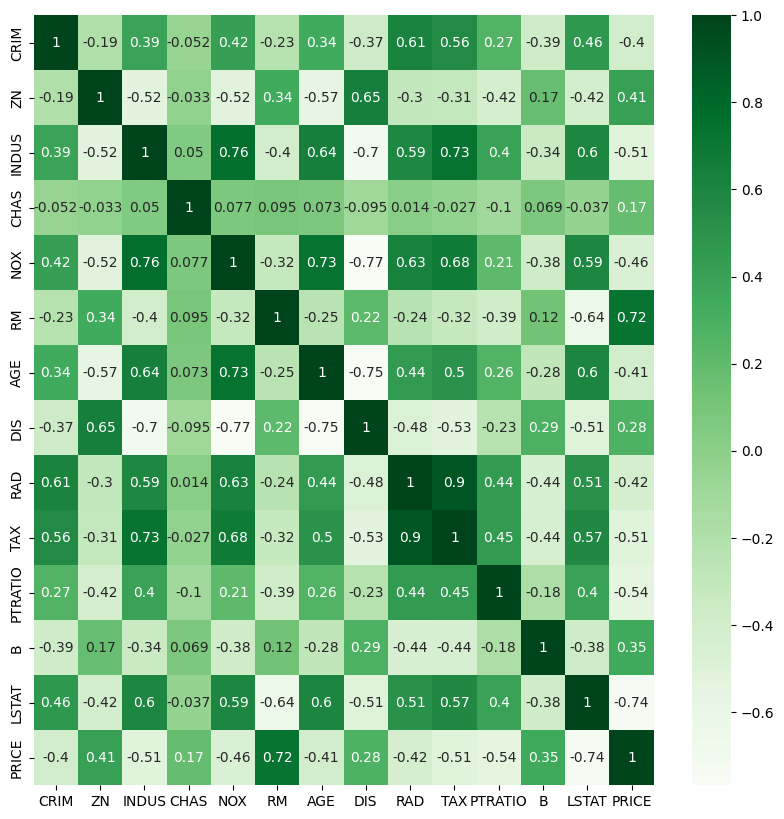

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Greens')

C:\Users\aarsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


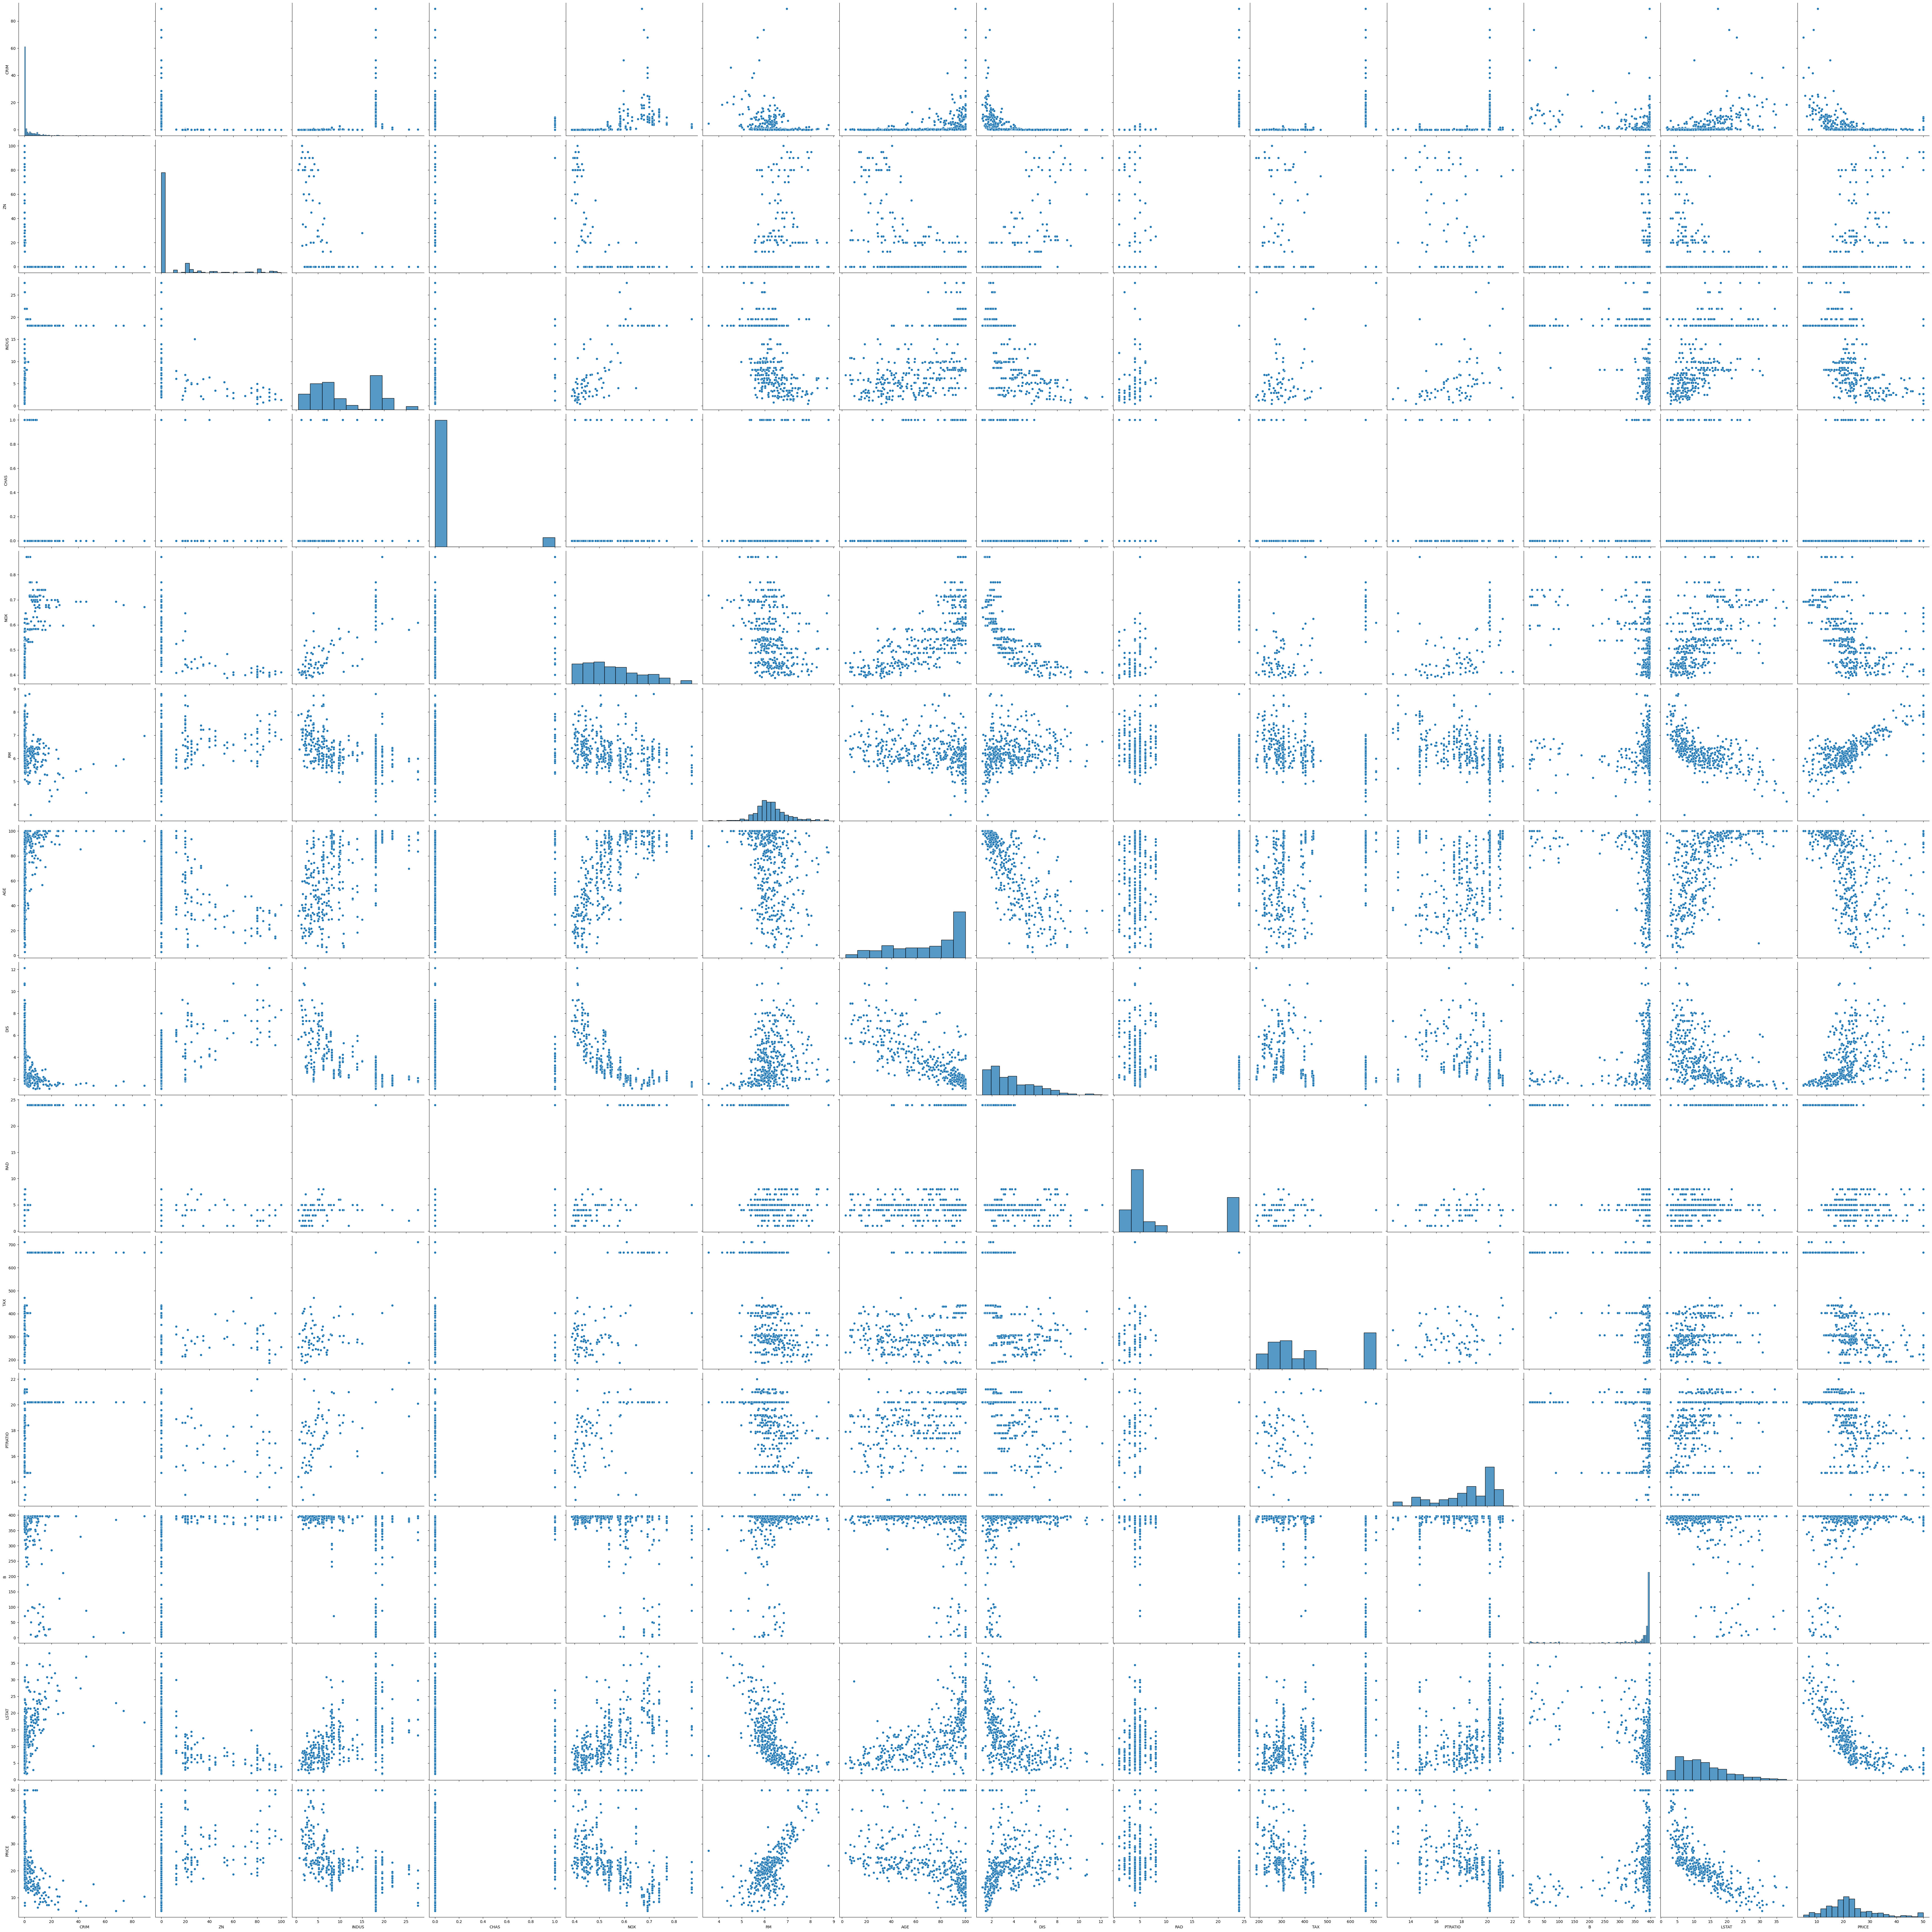

In [27]:
sns.pairplot(df, size=5)

<Axes: >

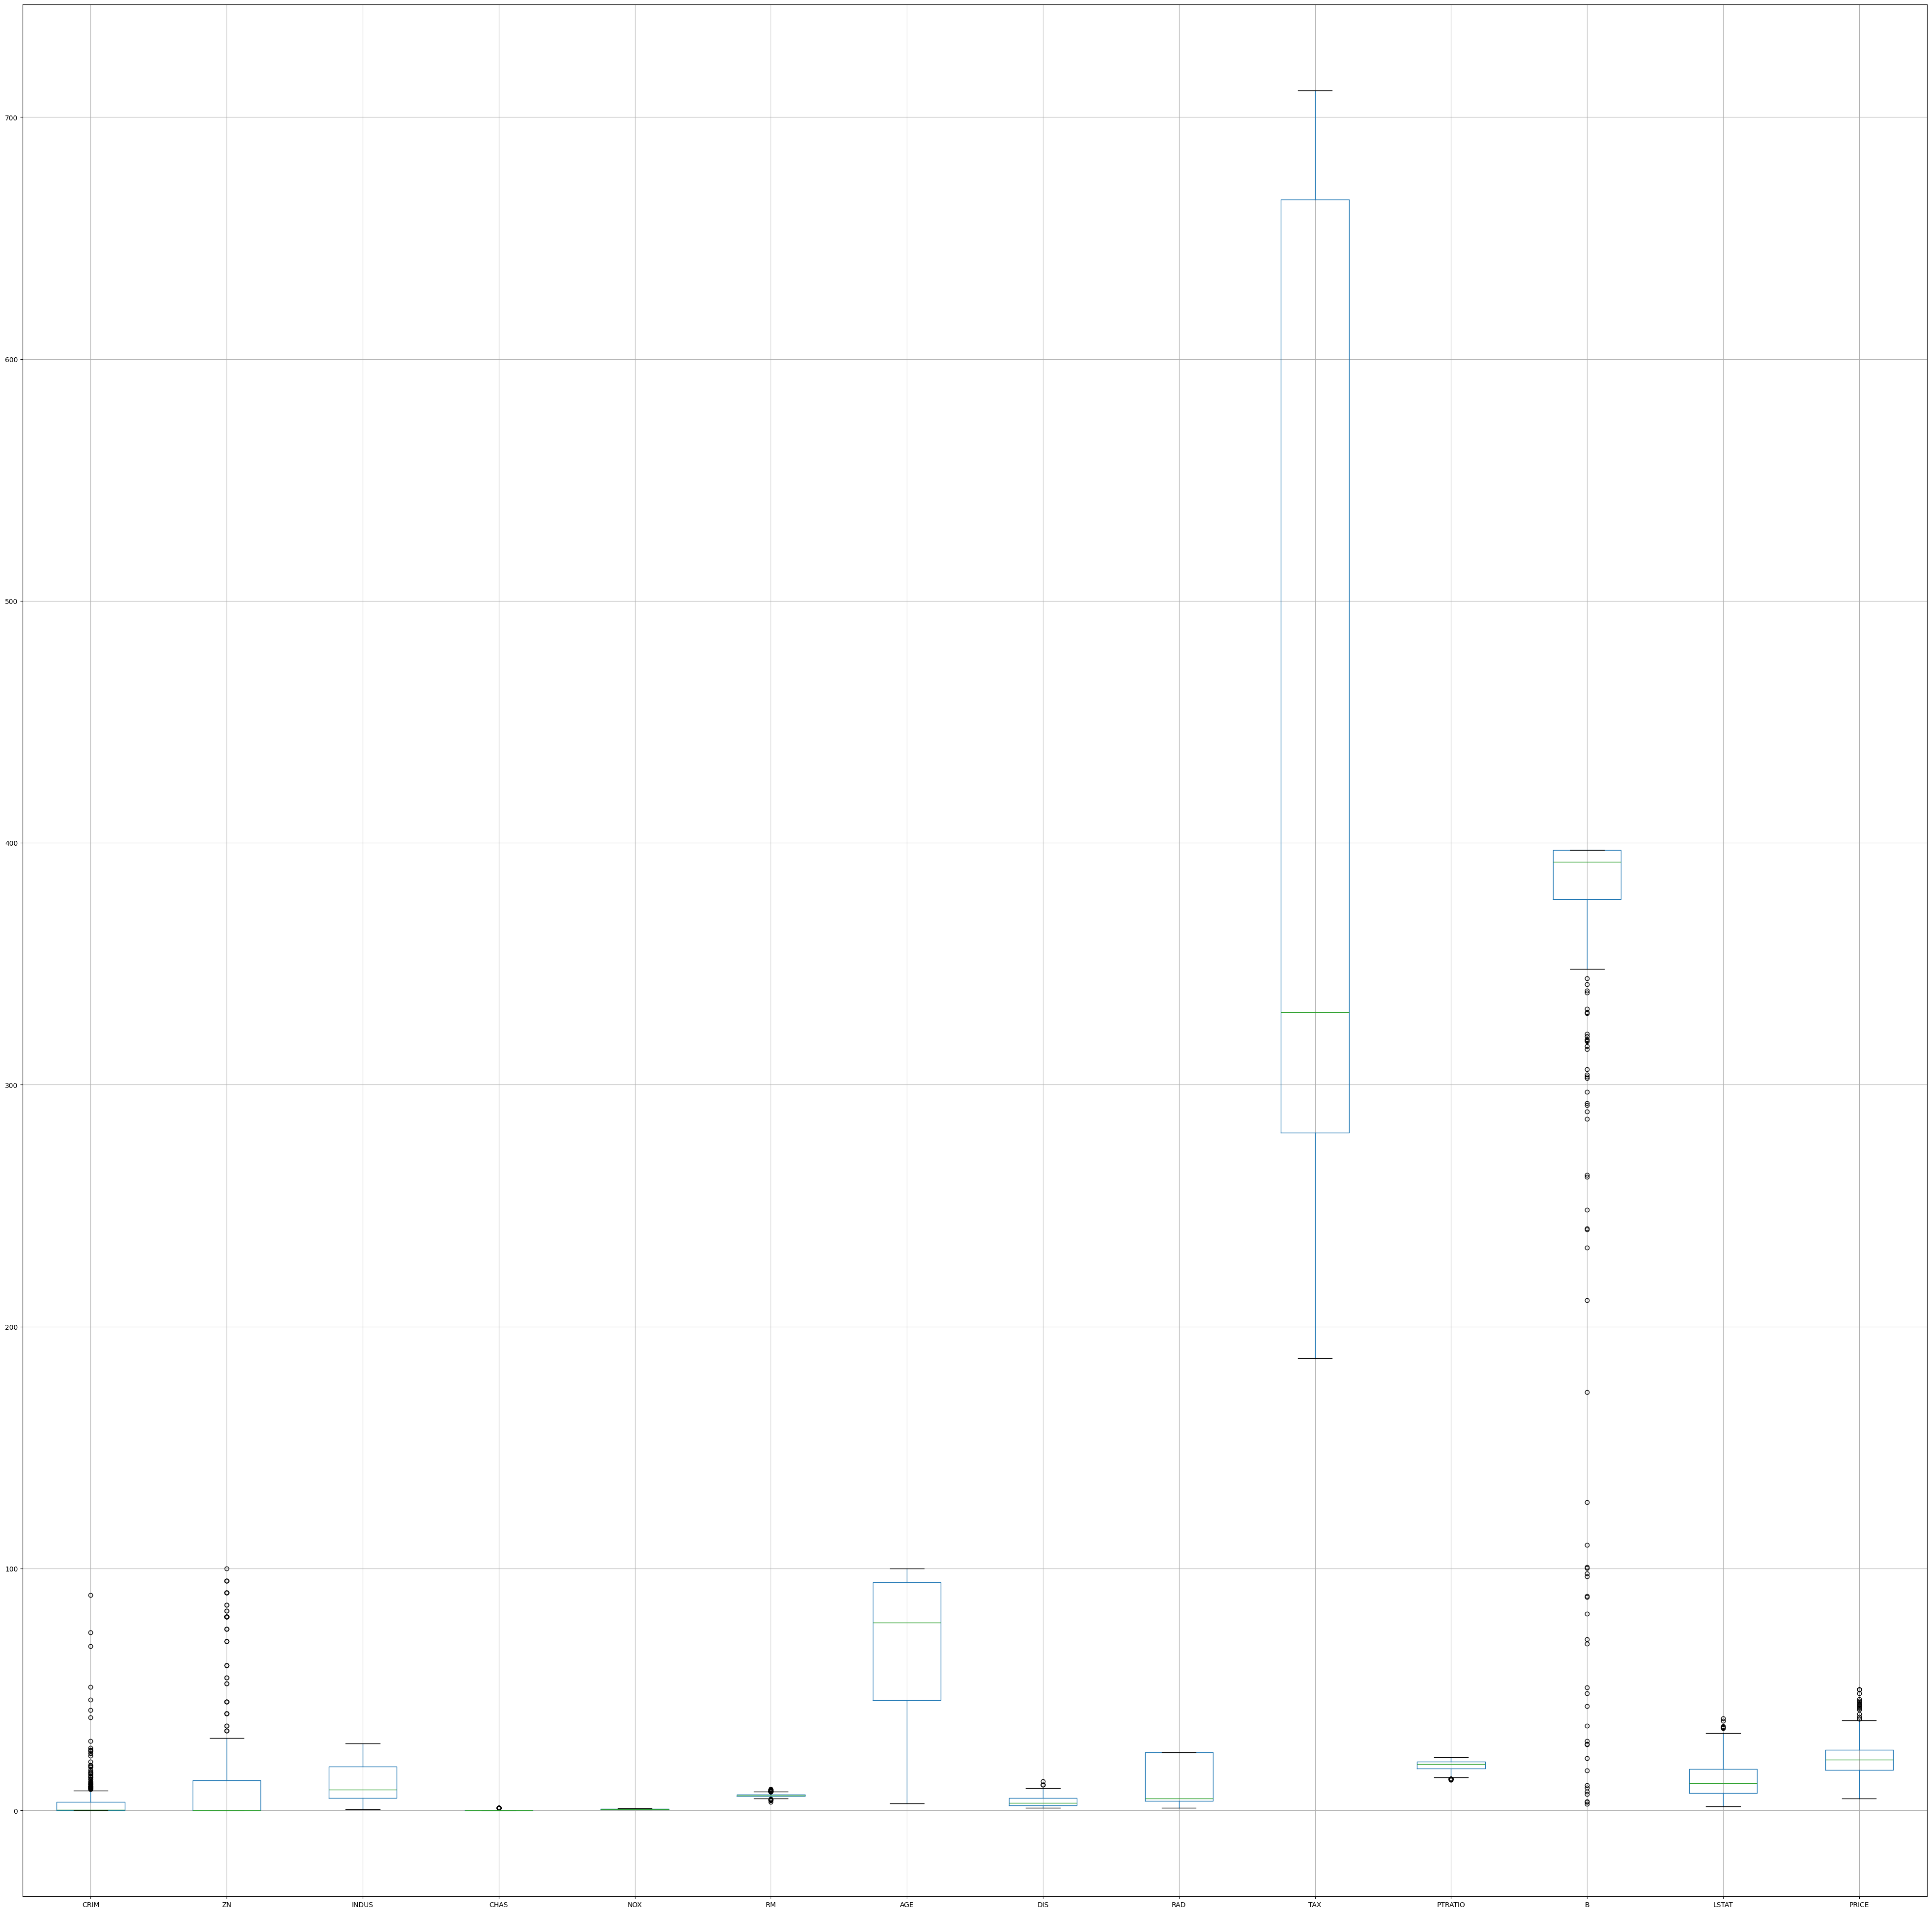

In [28]:
# Plot a Boxplot
plt.figure(figsize=(50,50))
df.boxplot()

In [29]:
# Minimum Price
df.PRICE.min()

5.0

In [30]:
# Masximum Price
df.PRICE.max()

50.0

In [31]:
# Standard Deviation
df.PRICE.std()

9.142979112356754

# Machine Learning - Linear Regression

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
X = np.array(df.drop('PRICE', axis=1))
y = np.array(df.PRICE)



# Splitting the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

In [35]:
len(X_train)

315

In [36]:
len(y_train)

315

In [37]:
len(X_test)

79

In [38]:
len(y_test)

79

# Choosing the model

In [39]:
model = LinearRegression()

# Fitting/Train the model

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
# Intercept Value
model.intercept_

33.65240504056566

In [42]:
# Coefficient Value
model.coef_

array([-1.12187394e-01,  4.24404148e-02,  2.56728238e-02,  1.98383708e+00,
       -1.70792571e+01,  4.25809072e+00, -2.17413906e-02, -1.42418883e+00,
        2.35587949e-01, -1.19971379e-02, -9.75834850e-01,  9.59377961e-03,
       -3.88619588e-01])

# Prediction

In [43]:
y_test

array([25. , 18.6, 21. , 23.5, 17.5, 33.8, 19.7, 24.8, 32. , 14. , 21.7,
       50. , 16.5, 20. , 20.6, 24.1, 19.4, 17.2, 50. , 11. , 18.2, 16.8,
       12.6, 24. , 22.6, 17.4, 22. , 30.8, 20.3, 22.6, 50. , 14.6, 50. ,
       20. , 19.5, 17.1, 17.4, 22. , 22.5, 21. , 26.6, 39.8, 23. , 29.4,
       34.6, 19.4, 24.7, 16.3, 19.2, 24.8, 20. , 19.4, 13.5, 19.1, 23.1,
       22.7, 50. , 22.4, 16.6, 21. , 21.7, 24.5, 14.9, 30.1,  7. , 31.7,
       14.9, 26.7, 23.8, 27.1, 35.4, 33.2, 16.1, 23. , 19.9, 38.7, 17.1,
       33.4, 15.2])

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([29.22850199, 17.5037472 , 21.80803847, 30.4942528 , 18.50265527,
       34.7432311 , 22.07369779, 30.7541295 , 33.52029866, 14.82910783,
       22.14507214, 41.26427356, 22.51242483, 16.87300668, 19.0023074 ,
       20.77110711, 17.26921288, 15.48568273, 22.69482862, 14.12652975,
       18.19319969, 20.48292217, 17.04235173, 29.66737037, 26.09718411,
       16.06132841, 27.09746911, 31.45656662, 22.64238912, 27.06681913,
       41.10181897, 18.21320236, 23.062681  , 17.41202659, 17.39546606,
       21.076803  , 22.38598488, 21.66963934, 22.9118984 , 20.80249561,
       27.70046219, 34.60121409, 22.25931447, 30.83868791, 35.33229137,
       19.76393425, 24.99195034, 10.39133132, 19.75538217, 25.31114768,
       21.55934818, 25.89776968, 14.23212614, 18.66822307, 18.34126683,
       24.31756905, 43.40891373, 22.87668508, 15.3452895 , 23.17268086,
       21.11796307, 21.4821572 , 14.66508216, 28.92300146, -3.71655126,
       32.60224615, 16.81628299, 31.90077457, 24.78013157, 20.11

# Testing the model performance

In [46]:
model.score(X_test,y_test)

0.6270849941673191

In [47]:
# R squared
r2_score(y_test,y_pred)

0.6270849941673191

In [49]:
# MSE
mean_squared_error(y_test,y_pred)

31.454047664950867

In [50]:
# MAE
mean_absolute_error(y_test,y_pred)

3.367983225154239

In [51]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

5.608390826694486

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

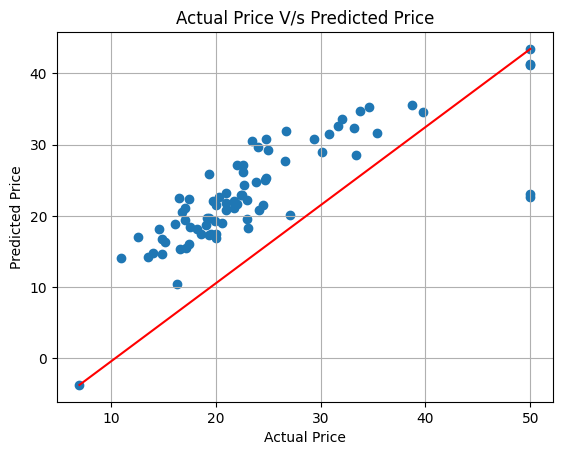

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')
plt.title('Actual Price V/s Predicted Price')